## 7- Step Process:
- Data Cleaning
- EDA
- Text Preprocessing
- Model Building
- Evaluation
- Improvement
- Deployment

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("spam.csv", encoding='latin1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.shape


(5572, 5)

# Data Cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
data.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [7]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data.sample(5)

,v1,v2
695,ham,Good. Good job. I like entrepreneurs
3258,spam,Congratulations! Thanks to a good friend U hav...
5153,ham,Haven't left yet so probably gonna be here til...
1228,spam,FREE entry into our å£250 weekly comp just sen...
3176,ham,In meeting da. I will call you


In [9]:
#Renaming Columns

data.rename(columns = {'v1' : 'Target', 'v2' : 'Text' }, inplace = True)

In [10]:
data.sample(5)

,Target,Text
2884,ham,ÌÏ still attending da talks?
4758,spam,Thanks 4 your continued support Your question ...
569,ham,WOT U WANNA DO THEN MISSY?
5517,ham,Miles and smiles r made frm same letters but d...
4044,ham,If You mean the website. Yes.


In [11]:
data.head(5)

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [14]:
data['Target'] = encoder.fit_transform(data['Target'])

In [15]:
data.head(10)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [16]:
#Missing Values

data.isnull().sum()

Target    0
Text      0
dtype: int64

In [17]:
#Check for duplicacies

data.duplicated().sum()

403

In [18]:
#Remove Duplicates

data = data.drop_duplicates(keep = 'first')


In [19]:
data.duplicated().sum()

0

In [20]:
data.shape

(5169, 2)

### EDA

In [21]:
data['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

In [22]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


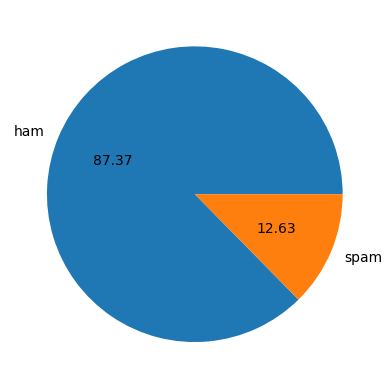

In [23]:
import matplotlib.pyplot as plt
plt.pie(data['Target'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show()

# Insight: Data is Imbalanced. Spam very less

Next we go for analysis of how many alphabets, words and sentences that are used in the SMSs

In [24]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [25]:
import nltk

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nathb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Now we will create few columns for deeper analysis. The first column will be number of characters in the sms, 2nd the no of words in the sms, 3rd the no of sentences in the sms. That we will do with the help of Nltk library.

How do we calculate characters

In [27]:
data['Characters'] = data['Text'].apply(len)

In [28]:
data.head(5)

,Target,Text,Characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


Now we find the number of words per sms, this will be done using NLTK library

In [29]:
#number of words
data['Text'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Text, Length: 5169, dtype: object

So now we have the list of words per sms. All we need to do is induce the "len" function in the code above

In [30]:
#length of words per sms
data['Text'].apply(lambda x: len(nltk.word_tokenize(x)))


0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: Text, Length: 5169, dtype: int64

In [31]:
#Creating the second column
data["sms_length"] = data['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [32]:
data.head()

,Target,Text,Characters,sms_length
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


Now we need to add no of sentences. We will use the same code but in nltk we will use sent tokenize

In [33]:
data['Text'].apply(lambda x: nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: Text, Length: 5169, dtype: object

So here we are tokenizing the content based on the sentences basically dividing them into small parts. Here we want the length of no of sentences 

In [34]:
data["num_sentences"] = data['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [35]:
data.head()

,Target,Text,Characters,sms_length,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


Now that we have created new columns from our already existing features, now I need to see the statistical measuers which I will be doing it using "describe" fucntion

In [36]:
data.loc[:,data.columns != 'Target'].describe()

,Characters,sms_length,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


Here we can see that theres one sms where the max no of characters is 910 whereas the longest sms in terms of number of words is 220 and also the max no fo sentences in a single sms is 38. Also mean of characters in each msg is almost 79, i.e there are atleast 79 characters in each msg. Whereas there are 18 words in each msg also each msg contains 2 sentences at the minimum.  

We can check the description of spam and ham messages distinctively with the code below, 0 for Ham msgs and 1 for Spam msgs

In [37]:
data.loc[:, data.columns != 'Target'][data['Target'] == 0 ].describe()

,Characters,sms_length,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


Here we can see the same stats for ham msgs.

Lets do the same for Spam msgs. i.e. Target will be '1'

In [38]:
data.loc[:, data.columns != 'Target'][data['Target'] == 1 ].describe()

,Characters,sms_length,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


We can check the same stats for max, min and mean based on characters, sms length and num sentences

Now we will check the histograms with the help of seaborn


In [39]:
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='Characters', ylabel='Count'>

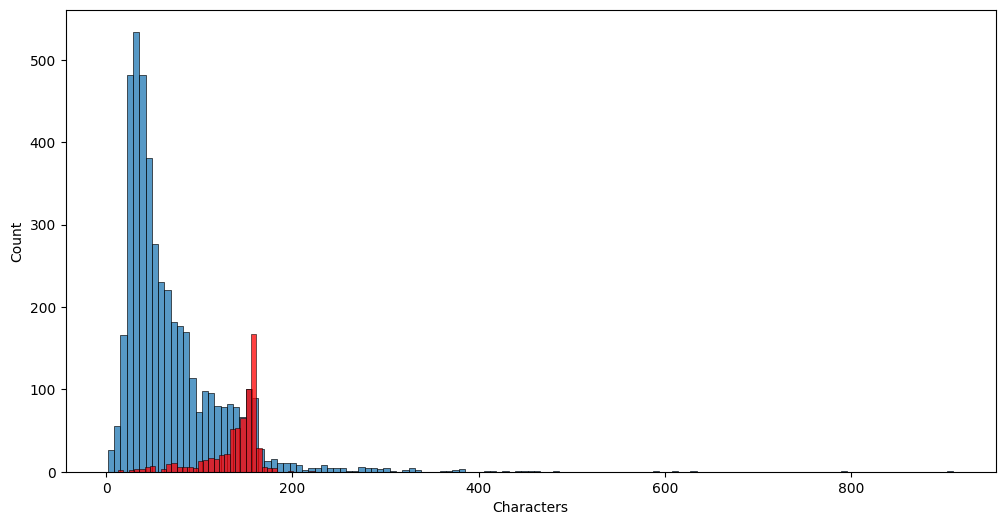

In [40]:
import seaborn as sns
plt.figure(figsize = (12,6) )
sns.histplot(data[data['Target'] == 0]['Characters']) 
sns.histplot(data[data['Target'] == 1]['Characters'], color= 'red') 


Insights :  Here on an average the no of characters used in ham (Target = 0 ) messages is less than the no of characters used in spam (Target =0) messgaes

Now lets do the same for sms length based on words


<Axes: xlabel='sms_length', ylabel='Count'>

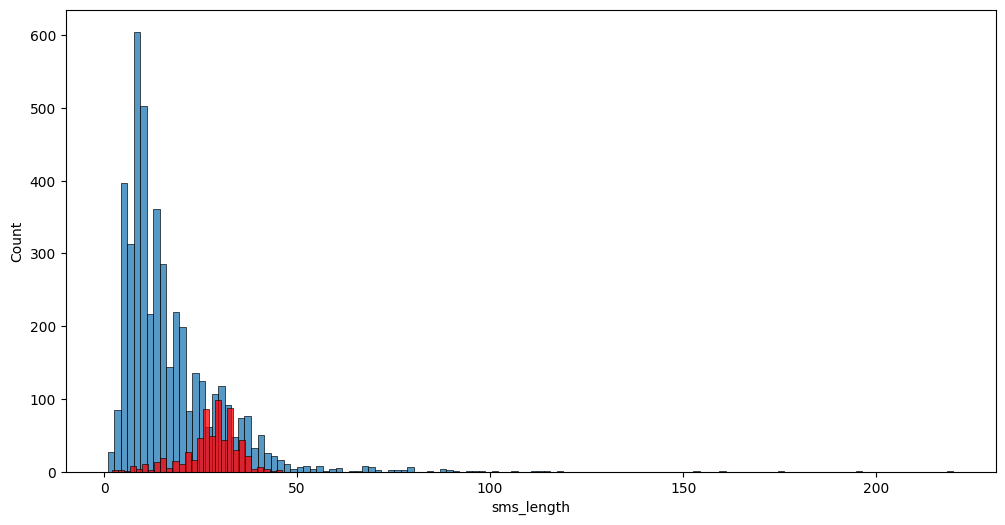

In [41]:
plt.figure(figsize = (12,6) )
sns.histplot(data[data['Target'] == 0]['sms_length']) 
sns.histplot(data[data['Target'] == 1]['sms_length'], color= 'red') 

we can see that No of words per msg in ham have lower words than in spam msgs. There are outliers in the data that can disturb our analysis. Lets do a pairplot

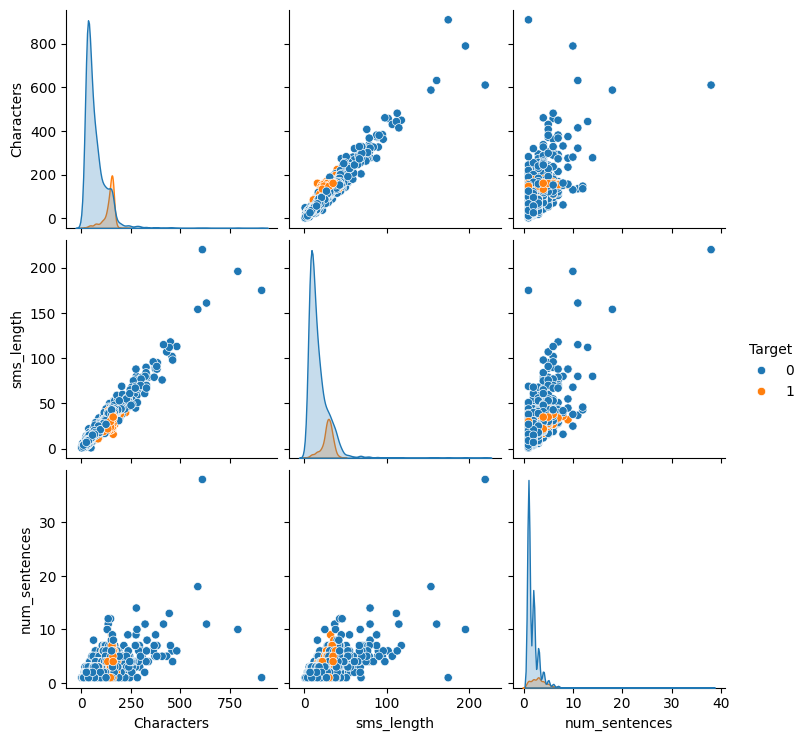

In [42]:
sns.pairplot(data, hue ='Target')

There are outliers in the data that can be clearly understood from the data

Now we can do a correlation coefficient

<Axes: >

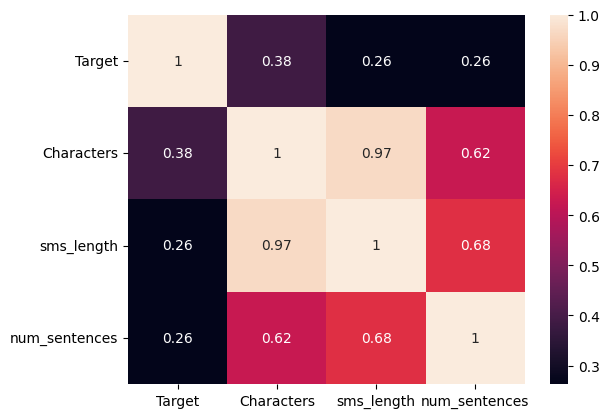

In [43]:
sns.heatmap(data.drop(columns=['Text']).corr(), annot = True)

Target and characters has a correlation of 0.38 which means as the no of characters increases the tendency of it being a spam increases.  If we talk about the other columns, no of sentences and characters has a high corealtion i.e. 0.62 while with sms_length or no of words has even higher correlation, i.e. 068, and also correlation between charcters and sms length is 0.97, which suggests that there is multicolinearity. This means if we wan tot make a model we will only take on feature out of the three. In our case it will be characters which is 0.38 with the Target column.  We cant keep the 3 because there is high correlation between the three columns 

# Text preprocessing

Steps: 
1. Lower Case
2. Tokenization : we break the sentences into words
3. Removing special characters
4. Removing stop words and punctuation : Stop words such as "is", "of", "the", words that help us build  asentence but doesnt hold much significance
5. Stemming : Say we have the same type of wprds such as swim, swimming and swam, we will convert this words to swim becasue they all mean swim, 

We will create a function that will do all these steps in a single call



To see stop words we need to import stopwords from nltk corpus. We can see the words that are tagged as stop words


In [44]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

To view punctuatuion marks


In [45]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

For stemming


In [46]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [47]:
def transform_txt (text):
    text = text.lower()
    text= nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y [:] #cloning
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join (y)

In [48]:
transform_txt("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [49]:
data['Text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

Now we will make  anew column by the name 'Transformed_text' where we will store the transforamtions or the text preprocessing

In [50]:
data['Transformed_txt'] = data ['Text'].apply(transform_txt)

In [51]:
data.head()

,Target,Text,Characters,sms_length,num_sentences,Transformed_txt
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Now we will use word cloud for hams and spams to highlight the most used words. The most used words will be highlighed with bigger fonts. We will use Wordcloud library for that.

In [52]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [53]:
from wordcloud import WordCloud

In [54]:
wc = WordCloud(width = 500, height =500, min_font_size =10, background_color= 'white')

Word Cloud for Spam

In [55]:
spam_wc = wc.generate(data[data['Target'] == 1]['Transformed_txt'].str.cat(sep = " "))

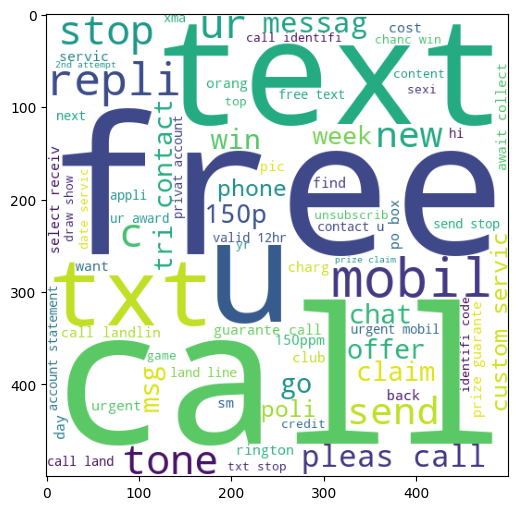

In [56]:
plt.figure(figsize =(12,6))
plt.imshow(spam_wc)

Word Cloud for Ham

In [57]:
ham_wc = wc.generate(data[data['Target'] == 0]['Transformed_txt'].str.cat(sep = " "))

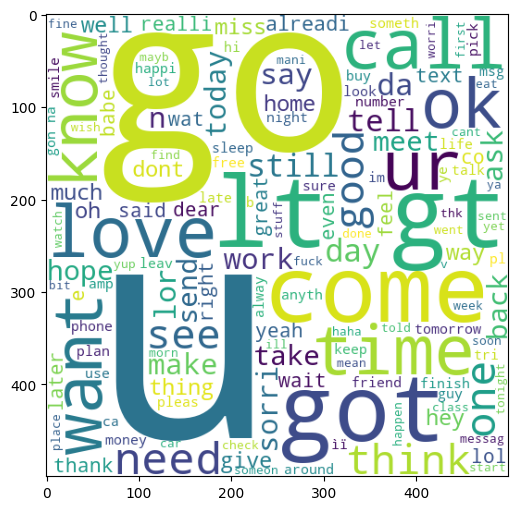

In [58]:
plt.figure(figsize =(12,6))
plt.imshow(spam_wc)

Now we will check out the top 30 words that are being used in spam and ham respectively


In [59]:
data.head()

,Target,Text,Characters,sms_length,num_sentences,Transformed_txt
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# For Spam

Now we convert the series 'transformed_txt' into a list of strings so that in the list, each msg is an item.

In [60]:
data[data['Target'] == 1]['Transformed_txt'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

Now we use for loop to print all the messages

In [61]:
for msg in data[data['Target'] == 1]['Transformed_txt'].tolist():
    print(msg)

free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv
winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour
mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030
six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info
urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18
xxxmobilemovieclub use credit click wap link next txt messag click http
england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq
thank subscript rington uk mobil charg pleas confirm repli ye repli charg
07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow
sm ac sptv new jersey devil detroit red wi

Here we have used spam_corpus as an empty list where we save the splitted msgs. After that we see the length of th espam messages which is around 10k words in total.

In [62]:
spam_corpus = []
for msg in data[data['Target'] == 1]['Transformed_txt'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [63]:
len(spam_corpus)

9939

Now we import a library named collections and a class named Counter. This will create a dictionary

In [64]:
from collections import Counter

Counter(spam_corpus)

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 141,
         'text': 122,
         'u': 119,
         'ur': 119,
         'mobil': 114,
         'stop': 104,
         'repli': 103,
         'claim': 98,
         '4': 97,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 60,
         'urgent': 57,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'collect': 45,
         'min': 45,
         'custom': 42,
         'messag': 42,
         'guarante': 42,
         'per': 41,
         'chat': 38,
         'tri': 37,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'offer': 33,
         'line': 33,
         'go': 32,
         'receiv': 31,
         'want': 3

In [65]:
Counter(spam_corpus).most_common(30) #The top 30 used words in Spam

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

Now we will convert this into a dataframe and also use seaborn to plot bar graph

In this line of code, Counter(spam_corpus).most_common(30) is counting the frequency of words in the spam_corpus and then picking the top 30 most common words.

When this is converted into a DataFrame using pd.DataFrame(), it creates a table where the first column (column with index 0) contains the words, and the second column (column with index 1) contains the corresponding counts of those words.

So, when you see [0] and [1], they are simply selecting the first and second columns of the DataFrame respectively. In layman’s terms:

[0] is used to select the words from the DataFrame.
[1] is used to select the counts of those words from the DataFrame.
The sns.barplot() function then creates a bar plot where the x-axis represents the words and the y-axis represents the counts of those words.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

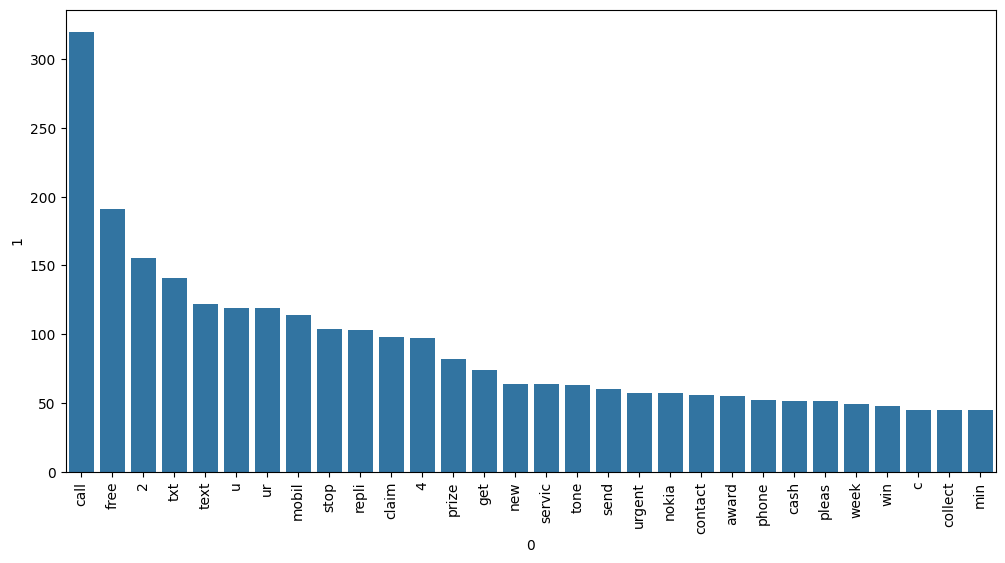

In [66]:
plt.figure(figsize =(12,6))
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1]) #The top 30 used words in Spam
plt.xticks(rotation = 'vertical')

# For HAM

In [67]:
ham_corpus = []
for msg in data[data['Target'] == 0]['Transformed_txt'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [68]:
len(ham_corpus)

35404

Since we have more number of ham msgs so more no of words in ham

In [69]:
Counter(ham_corpus)

Counter({'u': 883,
         'go': 404,
         'get': 349,
         'gt': 288,
         'lt': 287,
         '2': 284,
         'come': 275,
         'got': 236,
         'know': 236,
         'like': 234,
         'call': 233,
         'time': 219,
         'ok': 217,
         'love': 216,
         'good': 213,
         'want': 208,
         'ur': 197,
         'day': 190,
         'need': 170,
         'one': 165,
         'lor': 159,
         '4': 156,
         'home': 152,
         'think': 149,
         'see': 147,
         'take': 143,
         'still': 143,
         'da': 142,
         'tell': 133,
         'make': 129,
         'say': 127,
         'back': 127,
         'today': 123,
         'hope': 122,
         'ask': 121,
         'sorri': 121,
         'n': 120,
         'send': 120,
         'r': 120,
         'work': 118,
         'dont': 118,
         'meet': 112,
         'hi': 111,
         'well': 109,
         'thing': 109,
         'wat': 108,
         'k': 107,
  

In [70]:
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'lor'),
  Text(21, 0, '4'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'see'),
  Text(25, 0, 'take'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

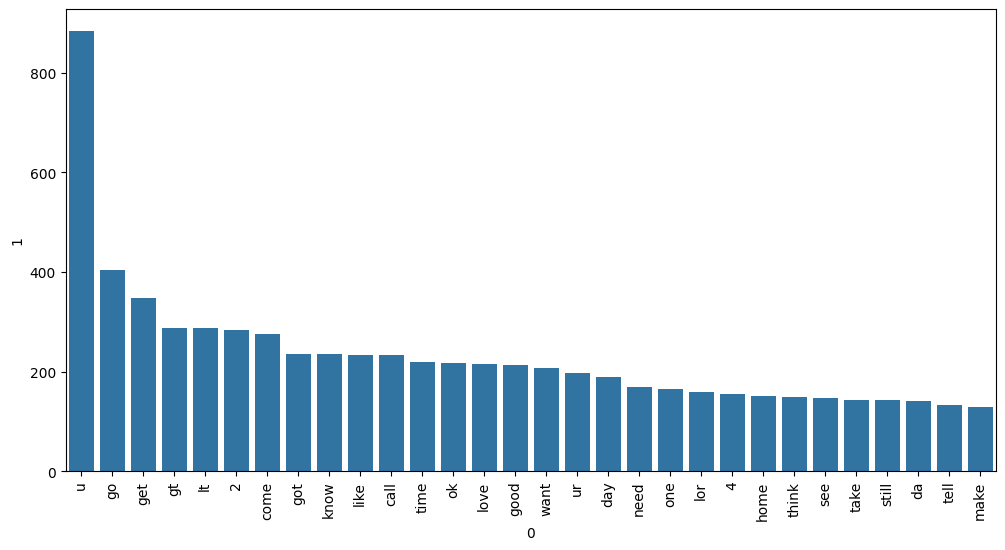

In [71]:
plt.figure(figsize =(12,6))
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1]) #The top 30 used words in Spam
plt.xticks(rotation = 'vertical')

# Model Building : Naive Bayes, works best on textual data

For Naive bayes we need numerical data. So what do we have? The target is already a numerical data whereas the transformed_txt is not numerical. Here the text should be converted to numbers or vectors. so we will be doing text vectorization. There are few methods:
- Bag of words : Here we will be making a column of the most frequent words and then we will check the count of frequent words per sms. The numbers that come in become the vectors
- TFIDF : TF-IDF (Term Frequency-Inverse Document Frequency): This method not only counts the occurrence of words in a document (like Bag of Words) but also takes into account how often the word appears in the entire corpus of documents. Words that are common across all documents are given less importance, while unique words are given more importance
- Word2Vec : This method uses a neural network to learn word associations from a large corpus of text. Instead of counting occurrences, it predicts context words for a given target word. As a result, words with similar meanings or used in similar contexts end up having similar vector representations, capturing semantic and syntactic relationships.

we will be using Bag of words and then feed it into Naive Bayes

In [91]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [92]:
X = tfidf.fit_transform(data['Transformed_txt']).toarray()

In [93]:
X.shape

(5169, 3000)

In [94]:
y = data['Target'].values

In [95]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [96]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [97]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [79]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [98]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [81]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [83]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [84]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [85]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [86]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [87]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829


c:\Users\nathb\Downloads\Sms spam classiifer\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [88]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [90]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))